# Petrol Consumption 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
petrol = pd.read_csv("petrol_consumption.csv")

In [3]:
petrol

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


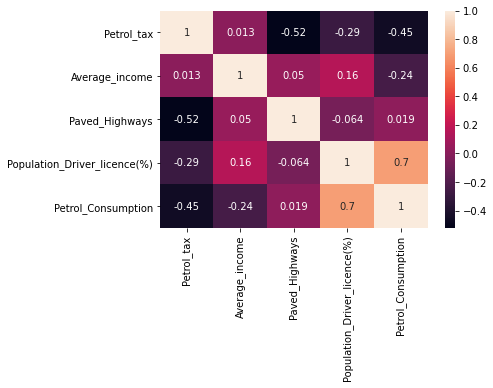

In [4]:
#correlation plot
sns.heatmap(petrol.corr(), annot = True)
plt.show()

C:\Users\megha\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\megha\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\megha\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\megha\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


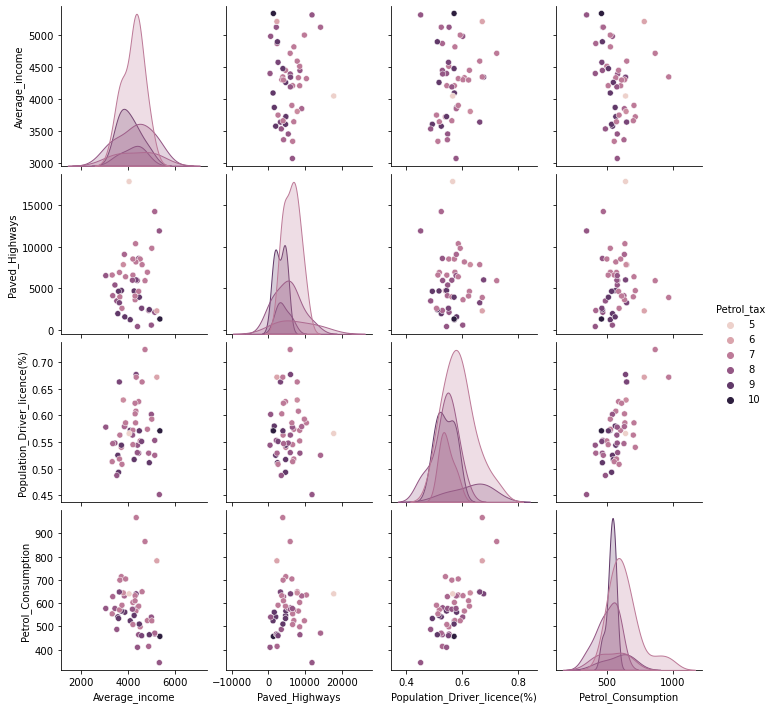

In [5]:
sns.pairplot(petrol,hue ="Petrol_tax")
plt.show()

# Linear regression

In [6]:
x= pd.DataFrame(petrol, columns=["Petrol_Consumption"])
y= pd.DataFrame(petrol, columns=["Petrol_tax"])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=5)

In [9]:
regressor=LinearRegression()

regressor.fit(xtrain,ytrain)

LinearRegression()

In [10]:
ypred= regressor.predict(xtest)

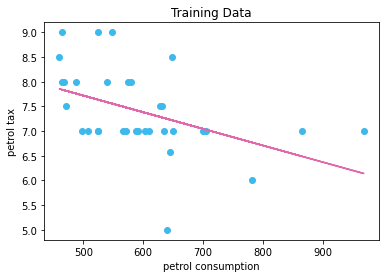

In [11]:
plt.scatter(xtrain,ytrain,color='#3EB9EB')
plt.plot(xtrain,regressor.predict(xtrain),color='#E168AB')
plt.xlabel('petrol consumption')
plt.ylabel('petrol tax')
plt.title("Training Data")
plt.show()

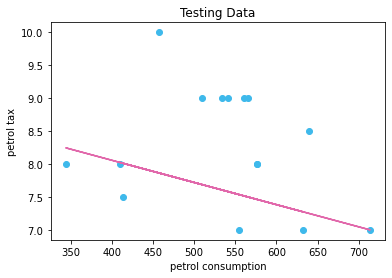

In [12]:
plt.scatter(xtest,ytest,color='#3EB9EB')
plt.plot(xtest,regressor.predict(xtest),color='#E168AB')
plt.xlabel('petrol consumption')
plt.ylabel('petrol tax')
plt.title("Testing Data")
plt.show()

In [13]:
print("intercept :",regressor.intercept_)
print("slope :",regressor.coef_)

intercept : [9.40315279]
slope : [[-0.00336949]]


In [14]:
score=r2_score(ytest,ypred)
print(score)

-0.5368372106826569


In [15]:
output = regressor.predict([[500]])
output

array([[7.71840561]])

# Multi linear regression

In [16]:
x= pd.DataFrame(petrol, columns=["Petrol_Consumption","Average_income"])
y= pd.DataFrame(petrol, columns=["Petrol_tax"])

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=5)

In [19]:
reg=LinearRegression()

reg.fit(xtrain,ytrain)

LinearRegression()

In [20]:
print("intercept :",reg.intercept_)
print("slope :",reg.coef_)

intercept : [9.74555588]
slope : [[-3.41729375e-03 -7.28330977e-05]]


In [21]:
ypred= reg.predict(xtest)

In [22]:
score=r2_score(ytest,ypred)
score

-0.5073061269229331

In [23]:
val = reg.predict([[500,3000]])
val

array([[7.81840971]])

# Polynomial Regression

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score

In [25]:
X = pd.DataFrame(petrol, columns=["Petrol_Consumption"])
Y = pd.DataFrame(petrol, columns=["Petrol_tax"])

In [26]:
poly=PolynomialFeatures(degree = 2)

In [27]:
X_poly = poly.fit_transform(X)
regressor = LinearRegression()
regressor.fit(X_poly,Y)
y_poly_pred=regressor.predict(X_poly)

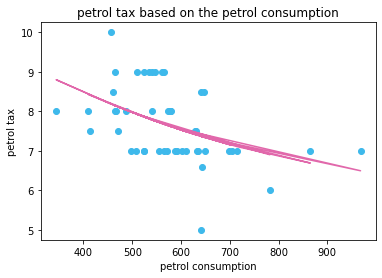

In [28]:
plt.scatter(X,Y,color='#3EB9EB')
plt.plot(X,y_poly_pred,color='#E168AB')
plt.xlabel('petrol consumption')
plt.ylabel('petrol tax')
plt.title("petrol tax based on the petrol consumption")
plt.show()

In [29]:
rmse = np.sqrt(mean_squared_error(Y,y_poly_pred))
r2 = r2_score(Y,y_poly_pred)
print('RMSE is ' + str(rmse))
print('r2 is ' +str(r2))

RMSE is 0.8361002907134454
r2 is 0.21021402803980938


In [30]:
regressor.predict(poly.fit_transform([[500]]))

array([[7.97159346]])

In [31]:
regressor.coef_

array([[ 0.00000000e+00, -8.21025399e-03,  3.44543018e-06]])

# super market dataset

In [32]:
sm = pd.read_csv("supermarket.csv")

In [33]:
sm

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [34]:
sm.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [35]:
sm = sm.drop(["Date", "Time"],1)

In [36]:
sm

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,65.82,4.761905,3.2910,4.1


# Data visualization

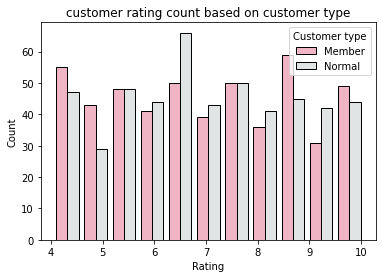

In [37]:
#how many customers of each customer type has given a particular rating
sns.histplot(data = sm, x = "Rating", hue = "Customer type", multiple = "dodge", shrink = 0.8, palette=["#EB9CB0","#D7DBDD"])
plt.title("customer rating count based on customer type")
plt.show()

In [38]:
sm["Product line"].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [39]:
pdcts = sm["Product line"].value_counts(ascending = True)

In [40]:
pddf = pd.DataFrame(pdcts)

In [41]:
pddf

,Product line
Health and beauty,152
Home and lifestyle,160
Sports and travel,166
Electronic accessories,170
Food and beverages,174
Fashion accessories,178


In [42]:
pddf.index

Index(['Health and beauty', 'Home and lifestyle', 'Sports and travel',
       'Electronic accessories', 'Food and beverages', 'Fashion accessories'],
      dtype='object')

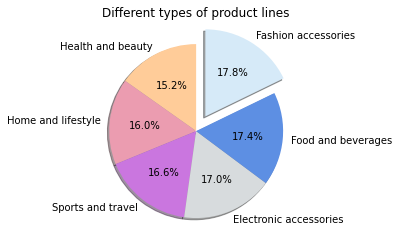

In [43]:
colors=["#ffcc99","#EB9CB0","#CA76DF","#D7DBDD","#5D8FE3","#D6EAF8"]
plt.pie(pddf["Product line"],shadow = True, labels=pddf.index,autopct="%1.1f%%", colors = colors, startangle = 90,explode=[0,0,0,0,0,0.2])
plt.title("Different types of product lines")
plt.show()

In [44]:
sm["Payment"].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [45]:
sm["Gender"].unique()

array(['Female', 'Male'], dtype=object)

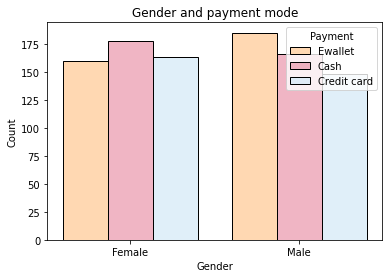

In [46]:
#Which type of payment mode is used by a particular gender
sns.histplot(data = sm, x = "Gender", hue = "Payment", multiple = "dodge", shrink = 0.8, palette =["#ffcc99","#EB9CB0","#D6EAF8"])
plt.title("Gender and payment mode")
plt.show()

In [47]:
total = sm.groupby('Product line')['Total'].sum()

In [48]:
pdtotal = pd.DataFrame(total)

In [49]:
pdtotal

,Total
Product line,
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Food and beverages,56144.8440
Health and beauty,49193.7390
Home and lifestyle,53861.9130
Sports and travel,55122.8265


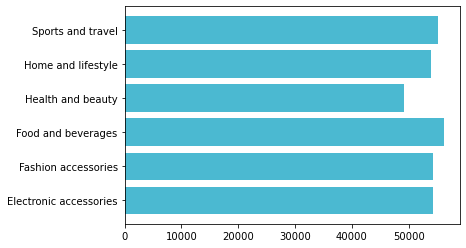

In [50]:
plt.barh(pdtotal.index, pdtotal["Total"], color="#4BB9D1")
plt.show()

In [51]:
cogs_total = sm.groupby('Product line')['cogs'].sum()

In [52]:
cogs_total

Product line
Electronic accessories    51750.03
Fashion accessories       51719.90
Food and beverages        53471.28
Health and beauty         46851.18
Home and lifestyle        51297.06
Sports and travel         52497.93
Name: cogs, dtype: float64

In [53]:
pdtotal["cogs"] = pd.DataFrame(cogs_total)

In [54]:
pdtotal

,Total,cogs
Product line,,
Electronic accessories,54337.5315,51750.03
Fashion accessories,54305.8950,51719.90
Food and beverages,56144.8440,53471.28
Health and beauty,49193.7390,46851.18
Home and lifestyle,53861.9130,51297.06
Sports and travel,55122.8265,52497.93


In [55]:
pdtotal["products"] = pdtotal.index

In [56]:
pdtotal

,Total,cogs,products
Product line,,,
Electronic accessories,54337.5315,51750.03,Electronic accessories
Fashion accessories,54305.8950,51719.90,Fashion accessories
Food and beverages,56144.8440,53471.28,Food and beverages
Health and beauty,49193.7390,46851.18,Health and beauty
Home and lifestyle,53861.9130,51297.06,Home and lifestyle
Sports and travel,55122.8265,52497.93,Sports and travel


In [57]:
pdtotal = pdtotal.rename(columns = {"Total":"Selling Price", "cogs":"Cost Price"})

In [58]:
pdtotal

,Selling Price,Cost Price,products
Product line,,,
Electronic accessories,54337.5315,51750.03,Electronic accessories
Fashion accessories,54305.8950,51719.90,Fashion accessories
Food and beverages,56144.8440,53471.28,Food and beverages
Health and beauty,49193.7390,46851.18,Health and beauty
Home and lifestyle,53861.9130,51297.06,Home and lifestyle
Sports and travel,55122.8265,52497.93,Sports and travel


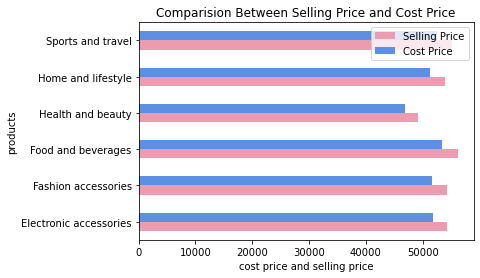

In [59]:
pdtotal.plot(x="products", y =["Selling Price","Cost Price"], kind ="barh", color = ["#EB9CB0","#5D8FE3"])
plt.title("Comparision Between Selling Price and Cost Price")
plt.xlabel("cost price and selling price")
plt.show()

# Decision tree

In [60]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [61]:
sm.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [62]:
sm["Product line"].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [63]:
sm["Product line"]=sm["Product line"].astype('category')
sm.dtypes

Invoice ID                   object
Branch                       object
City                         object
Customer type                object
Gender                       object
Product line               category
Unit price                  float64
Quantity                      int64
Tax 5%                      float64
Total                       float64
Payment                      object
cogs                        float64
gross margin percentage     float64
gross income                float64
Rating                      float64
dtype: object

In [64]:
sm["Product line"].cat.codes

0      3
1      0
2      4
3      3
4      5
      ..
995    3
996    4
997    2
998    4
999    1
Length: 1000, dtype: int8

In [65]:
sm["Product line"] = sm["Product line"].cat.codes

In [66]:
sm["Product line"]

0      3
1      0
2      4
3      3
4      5
      ..
995    3
996    4
997    2
998    4
999    1
Name: Product line, Length: 1000, dtype: int8

In [67]:
X=pd.DataFrame(sm,columns=['Unit price','Rating'])
Y=pd.DataFrame(sm,columns=['Product line'])

In [68]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10) # 70% training and 30% test

In [69]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy",max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [70]:
X_test

,Unit price,Rating
841,60.30,6.0
956,50.49,5.4
544,71.20,9.2
173,52.89,9.8
759,55.39,8.0
...,...,...
274,99.71,7.9
192,87.80,9.2
398,41.06,8.3
450,74.71,6.7


# Based on the unit price and rating of a particular product the investor gets a recommendation on which product line he need to invest

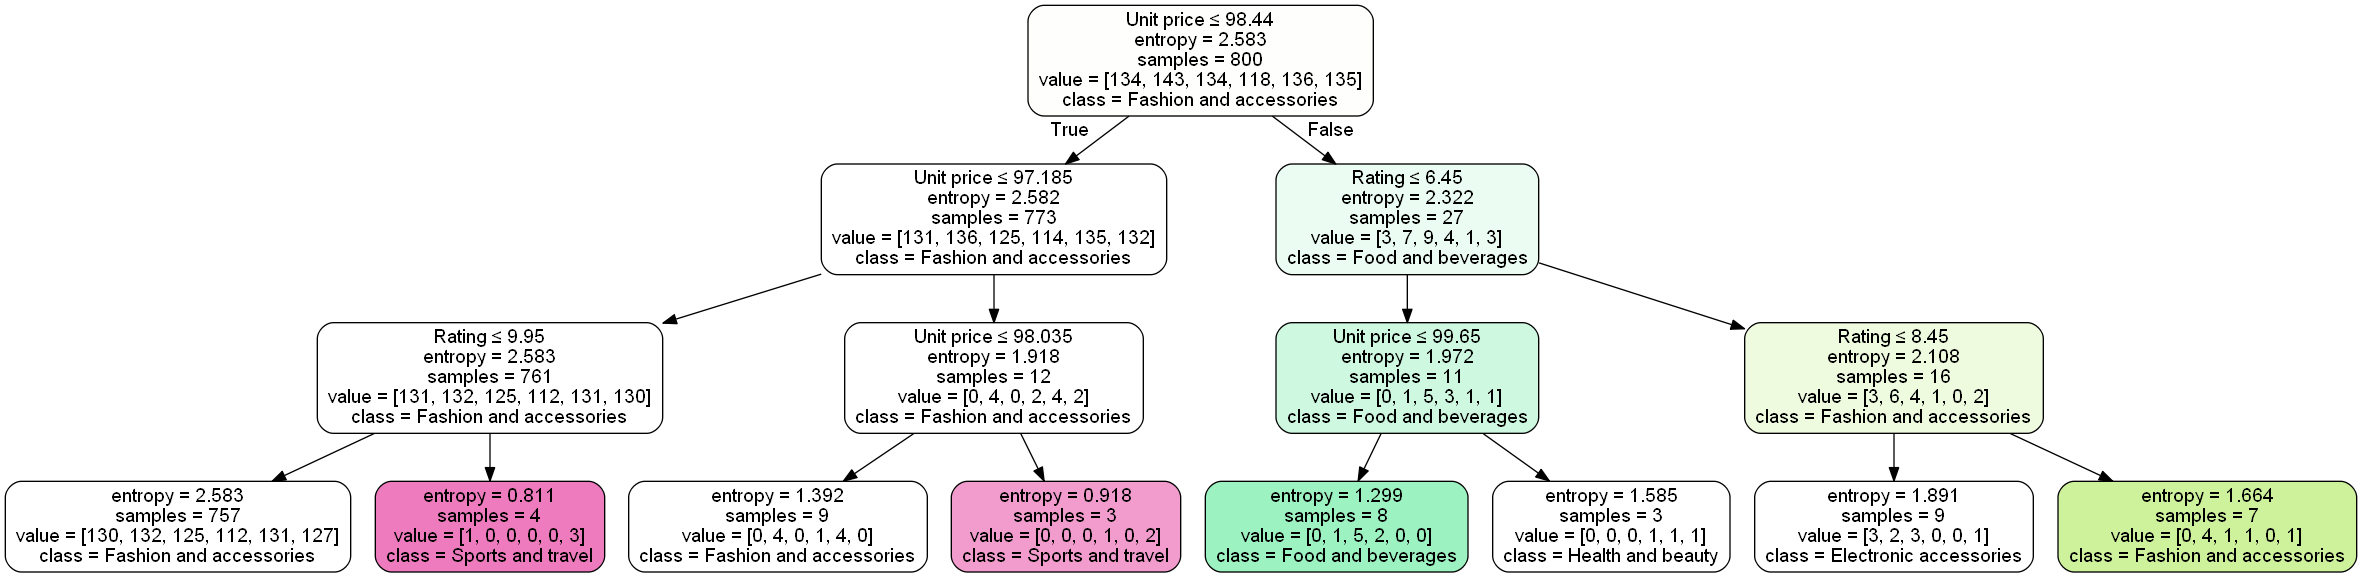

In [71]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = ['Unit price','Rating'],
                class_names=['Electronic accessories','Fashion and accessories','Food and beverages','Health and beauty','Home and lifestyle','Sports and travel'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('supermarket.png')
Image(graph.create_png())